In [1]:
import math
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from objective_function import get_function
from algorithm import GreyWolfOptimizer
from utils import plot_converge

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# data
DEPOT = pd.DataFrame({
    'Customer': 0,
    'Latitude': 4.4184,
    'Longitude': 114.0932,
    'Demand': 0
}, index=[0])

VEHICLE = os.path.join(os.getcwd(), 'data', 'vehicle.csv')
CUSTOMERS = os.path.join(os.getcwd(), 'data', 'customer.csv')

customers = pd.read_csv(CUSTOMERS)
vehicle = pd.read_csv(VEHICLE)
# cleaning
vehicle['Cost'] = vehicle['Cost'].str.replace('RM', "").str.replace('per km', "")

customers = pd.concat([DEPOT, customers]).reset_index(drop=True)

# GWO with 2-Opt Objective Function

By default, this algorithm also include vehicle factor in the optimization

----- Results for Agent: 10 -----


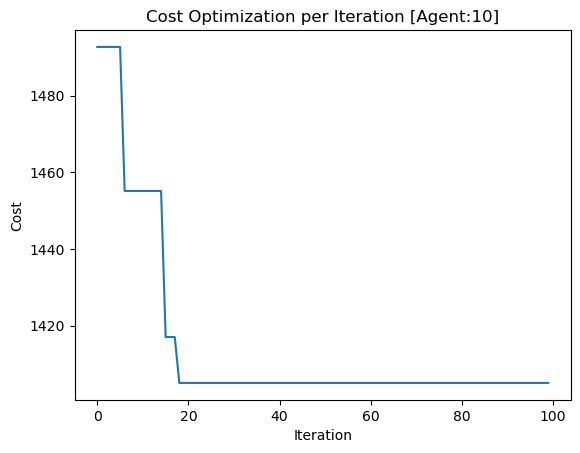

Actual Cost: RM 1405.0836750773365
Best Route: [0, 7, 5, 4, 1, 3, 2, 6, 9, 10, 8, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type A


In [5]:
# seed for repeatable results
seed_gen = 1234
np.random.seed(seed_gen)

# initialization for agent
search_agent = 10
function_name = 'Two_Opt'
max_iter = 100

# test function
[lb, ub, dim, fobj] = get_function(function_name)

# check lb, ub type
if not isinstance(lb, np.ndarray) or not isinstance(ub, np.ndarray):
    raise TypeError('Expected ub and lb to be in 2d numpy matrix')

# GWO
[best_score, best_pos, best_route, round_trip, gwo_curve] = GreyWolfOptimizer(search_agent, max_iter, lb, ub, dim, fobj)

# file save
fig = 0
fname = os.path.join(os.getcwd(), 'res', f'{str(fig).zfill(3)}.png')

print(f"----- Results for Agent: {search_agent} -----")
plot_converge(gwo_curve, f'Cost Optimization per Iteration [Agent:{search_agent}]', fname=fname)
print(f"Actual Cost: RM {best_score}")
print(f"Best Route: {best_route}")
print(f"Round Trip Distance: {round_trip}")
print(f"Vehicle Choosen: {vehicle['Vehicle'].loc[round(best_pos[0][0])]}")

----- Results for Iteration: 100 -----


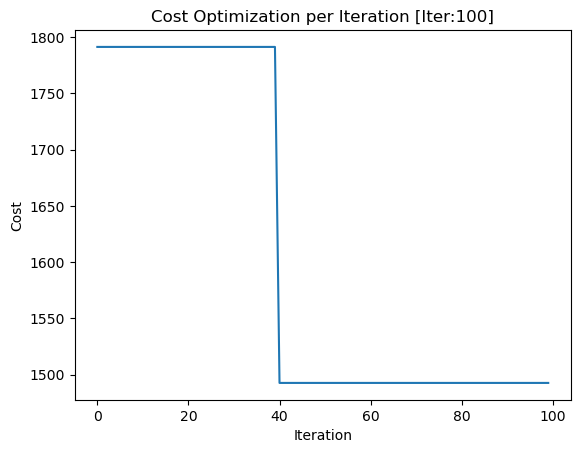

Actual Cost: RM 1492.7030074232462
Best Route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type A


----- Results for Iteration: 1000 -----


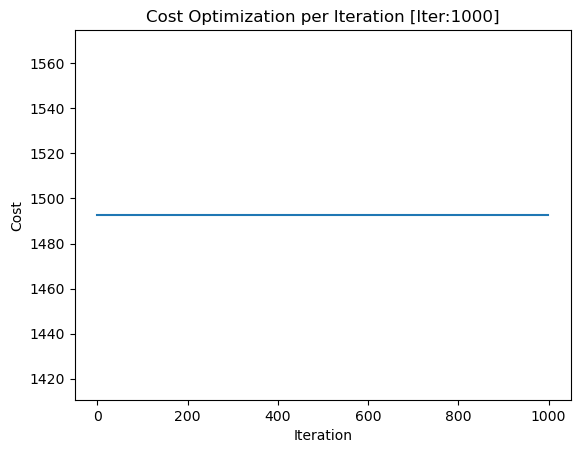

Actual Cost: RM 1492.7030074232462
Best Route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type A


----- Results for Iteration: 10000 -----


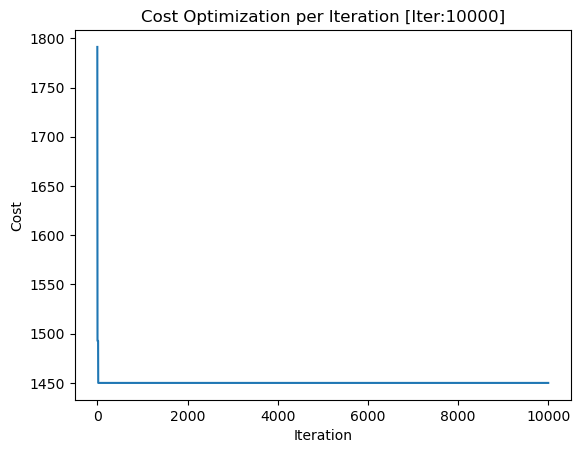

Actual Cost: RM 1449.9714426451437
Best Route: [0, 7, 5, 6, 2, 10, 9, 3, 4, 1, 8, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type A




In [6]:
# Experimenting with different number of agent
search_agent = 10
function_name = 'Two_Opt'
max_iter = [100, 1000, 10000]

# test function
[lb, ub, dim, fobj] = get_function(function_name)

for iter in max_iter:
    [best_score, best_pos, best_route, round_trip, gwo_curve] = GreyWolfOptimizer(search_agent, iter, lb, ub, dim, fobj)


    # file save
    fig += 1
    fname = os.path.join(os.getcwd(), 'res', f'{str(fig).zfill(3)}.png')

    print(f"----- Results for Iteration: {iter} -----")
    plot_converge(gwo_curve, f'Cost Optimization per Iteration [Iter:{iter}]', fname=fname)
    print(f"Actual Cost: RM {best_score}")
    print(f"Best Route: {best_route}")
    print(f"Round Trip Distance: {round_trip}")
    print(f"Vehicle Choosen: {vehicle['Vehicle'].loc[round(best_pos[0][0])]}")
    print("\n")

----- Results for Agent: 10 -----


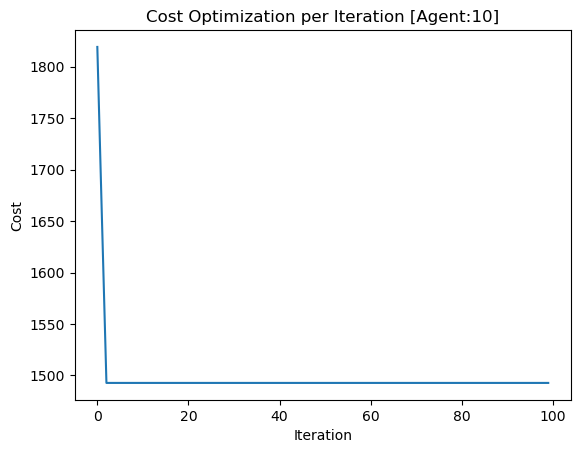

Actual Cost: RM 1492.7030074232462
Best Route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Round Trip Distance: 141.48678858137552
Vehicle Choosen: Type A


----- Results for Agent: 30 -----


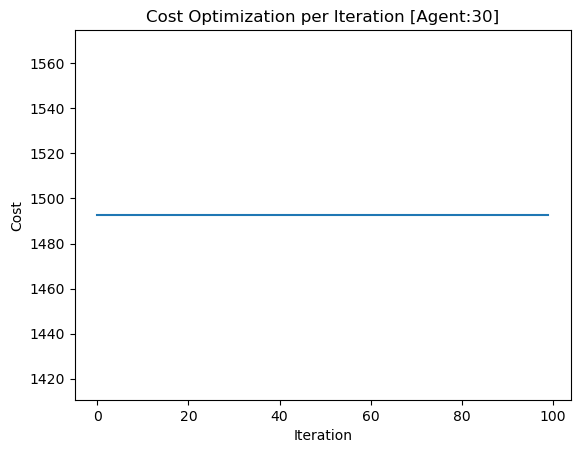

Actual Cost: RM 1492.7030074232462
Best Route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type B


----- Results for Agent: 60 -----


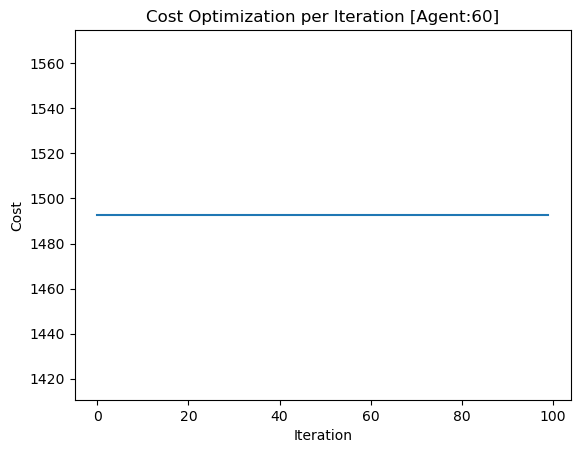

Actual Cost: RM 1492.7030074232462
Best Route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type A


----- Results for Agent: 90 -----


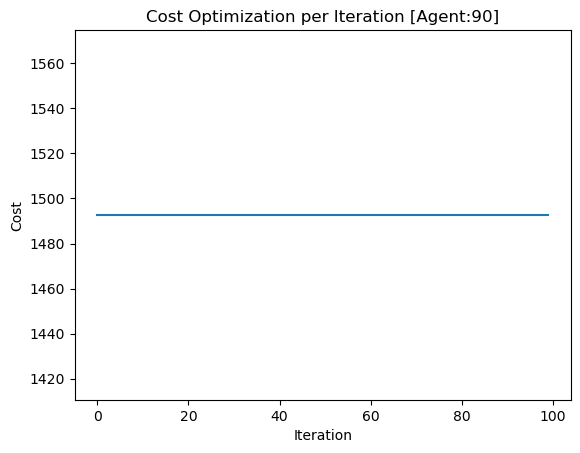

Actual Cost: RM 1492.7030074232462
Best Route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type A


----- Results for Agent: 100 -----


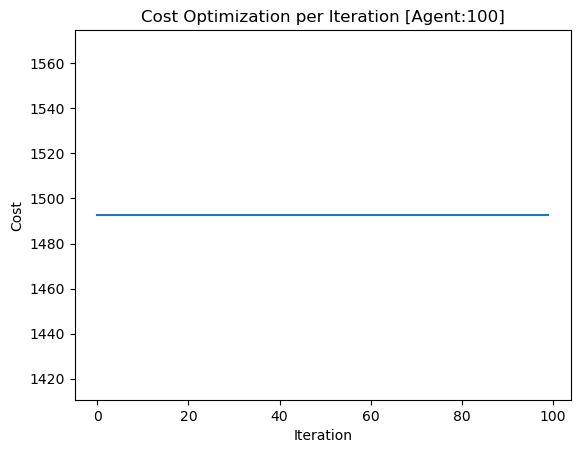

Actual Cost: RM 1492.7030074232462
Best Route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type A




In [7]:
# Experimenting with different number of agent
search_agent = [10, 30, 60, 90, 100]
function_name = 'Two_Opt'
max_iter = 100

# test function
[lb, ub, dim, fobj] = get_function(function_name)

for agent in search_agent:
    [best_score, best_pos, best_route, round_trip, gwo_curve] = GreyWolfOptimizer(agent, max_iter, lb, ub, dim, fobj)


    # file save
    fig += 1
    fname = os.path.join(os.getcwd(), 'res', f'{str(fig).zfill(3)}.png')

    print(f"----- Results for Agent: {agent} -----")
    plot_converge(gwo_curve, f'Cost Optimization per Iteration [Agent:{agent}]', fname=fname)
    print(f"Actual Cost: RM {best_score}")
    print(f"Best Route: {best_route}")
    print(f"Round Trip Distance: {round_trip}")
    print(f"Vehicle Choosen: {vehicle['Vehicle'].loc[round(best_pos[0][0])]}")
    print("\n")

### Route Optimization by specifying vehicle type

----- Results for Agent: 50 -----


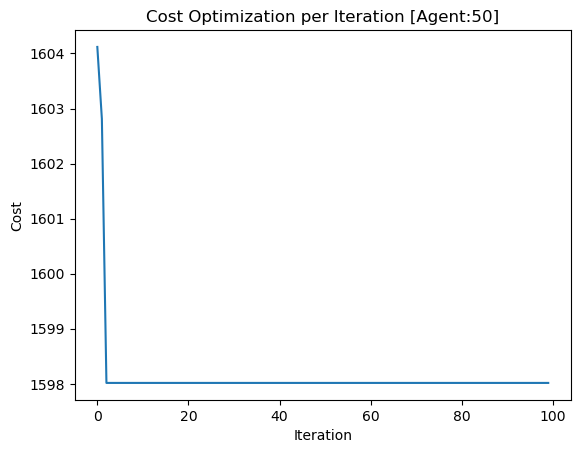

Actual Cost: RM 1598.0162890055203
Best Route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
Round Trip Distance: 90.03130056469814
Vehicle Choosen: Type A


In [8]:
# Vehicle A with Swap Method
search_agent = 50
function_name = 'Swap_TypeA'
max_iter = 100

# test function
[lb, ub, dim, fobj] = get_function(function_name)

# GWO
[best_score, best_pos, best_route, round_trip, gwo_curve] = GreyWolfOptimizer(search_agent, max_iter, lb, ub, dim, fobj)


# file save
fig += 1
fname = os.path.join(os.getcwd(), 'res', f'{str(fig).zfill(3)}.png')

print(f"----- Results for Agent: {search_agent} -----")
plot_converge(gwo_curve, f'Cost Optimization per Iteration [Agent:{search_agent}]', fname=fname)
print(f"Actual Cost: RM {best_score}")
print(f"Best Route: {best_route}")
print(f"Round Trip Distance: {round_trip}")
print(f"Vehicle Choosen: Type A")

----- Results for Agent: 50 -----


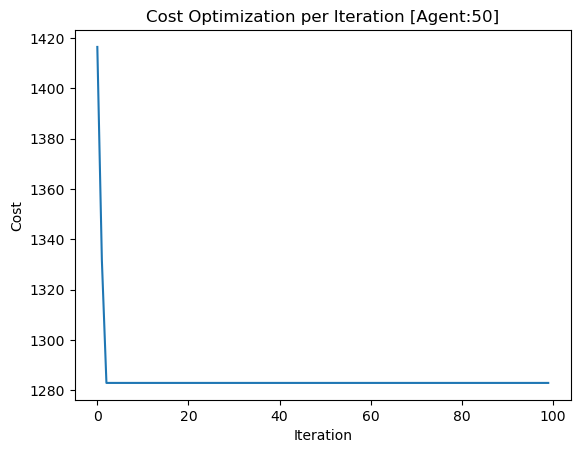

Actual Cost: RM 1282.9777968974718
Best Route: [0, 3, 4, 1, 8, 2, 5, 6, 7, 10, 9, 0]
Round Trip Distance: 116.33465396307635
Vehicle Choosen: Type B


In [9]:
# Vehicle B with Swap Method
search_agent = 50
function_name = 'Swap_TypeB'
max_iter = 100

# test function
[lb, ub, dim, fobj] = get_function(function_name)

# GWO
[best_score, best_pos, best_route, round_trip, gwo_curve] = GreyWolfOptimizer(search_agent, max_iter, lb, ub, dim, fobj)


# file save
fig += 1
fname = os.path.join(os.getcwd(), 'res', f'{str(fig).zfill(3)}.png')

print(f"----- Results for Agent: {search_agent} -----")
plot_converge(gwo_curve, f'Cost Optimization per Iteration [Agent:{search_agent}]', fname=fname)
print(f"Actual Cost: RM {best_score}")
print(f"Best Route: {best_route}")
print(f"Round Trip Distance: {round_trip}")
print(f"Vehicle Choosen: Type B")